In [1]:
import sklearn 
print(sklearn.__version__)

1.1.3


In [2]:
!pip install scikit-learn==1.1.3

In [3]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df=pd.read_csv("fuel consumption.csv")
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


<AxesSubplot:>

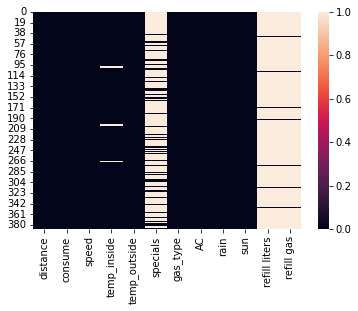

In [4]:
import seaborn as sb
sb.heatmap(df.isnull())

In [5]:
df.isnull()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,True
2,False,False,False,False,False,True,False,False,False,False,True,True
3,False,False,False,False,False,True,False,False,False,False,True,True
4,False,False,False,False,False,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
383,False,False,False,False,False,True,False,False,False,False,True,True
384,False,False,False,False,False,False,False,False,False,False,True,True
385,False,False,False,False,False,True,False,False,False,False,True,True
386,False,False,False,False,False,False,False,False,False,False,True,True


[Text(0, 0, 'refill liters'),
 Text(1, 0, 'refill gas'),
 Text(2, 0, 'specials'),
 Text(3, 0, 'temp_inside'),
 Text(4, 0, 'distance'),
 Text(5, 0, 'consume'),
 Text(6, 0, 'speed'),
 Text(7, 0, 'temp_outside'),
 Text(8, 0, 'gas_type'),
 Text(9, 0, 'AC'),
 Text(10, 0, 'rain'),
 Text(11, 0, 'sun')]

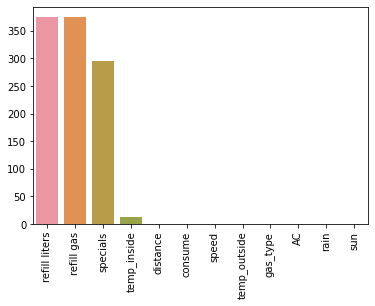

In [6]:
null_values=df.isnull().sum().sort_values(ascending=False)
ax=sb.barplot(null_values.index,null_values.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


<AxesSubplot:>

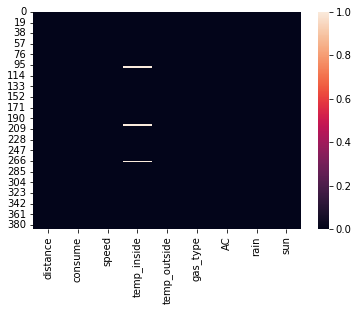

In [7]:
df.drop(["refill liters","refill gas","specials"],axis=1,inplace=True)
sb.heatmap(df.isnull())

In [8]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,SP98,0,0,0
384,"16,1","4,3",38,25,31,SP98,1,0,0
385,16,"3,8",45,25,19,SP98,0,0,0
386,"15,4","4,6",42,25,31,SP98,1,0,0


In [9]:

for i in range(len(df["temp_inside"])):
    if(type(df["temp_inside"][i])==str):
        l=list(map(int,df["temp_inside"][i].split(",")))
        if(len(l)==2):
            df["temp_inside"][i]=float(l[0]+l[1]/10**len(str(l[1])))
    df["temp_inside"][i]=float(df["temp_inside"][i])       #cleaning temp_inside
    if(type(df["distance"][i])==str):
        l=list(map(int,df["distance"][i].split(",")))
        if(len(l)==2):
            df["distance"][i]=float(l[0]+l[1]/10**len(str(l[1])))
    df["distance"][i]=float(df["distance"][i])           #cleaning distance
    if(type(df["consume"][i])==str):
        l=list(map(int,df["consume"][i].split(",")))
        if(len(l)==2):
            df["consume"][i]=float(l[0]+l[1]/10**len(str(l[1])))
    df["consume"][i]=float(df["consume"][i])             #cleaning consume
    if(df["gas_type"][i]=='E10'):
        df["gas_type"][i]=0
    else:                                                #E10 - 0 , SP98 - 1
        df["gas_type"][i]=1

In [10]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,1,0,0,0
384,16.1,4.3,38,25.0,31,1,1,0,0
385,16.0,3.8,45,25.0,19,1,0,0,0
386,15.4,4.6,42,25.0,31,1,1,0,0


In [11]:
temp_in_mean=np.mean(df["temp_inside"])
print(temp_in_mean)
df["temp_inside"].fillna(temp_in_mean,inplace=True)

21.929521276595743


<AxesSubplot:>

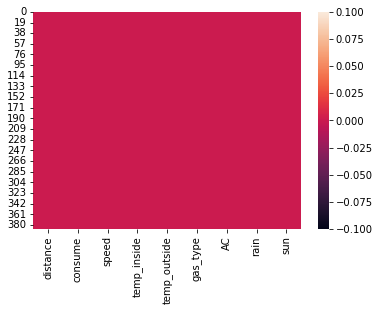

In [12]:
sb.heatmap(df.isnull())

In [13]:
Y=df["consume"]
X=df.drop(["consume"],axis=1)
print(X.columns)

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC',
       'rain', 'sun'],
      dtype='object')


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.1)
print(x_train.shape,x_test.shape)

(349, 8) (39, 8)


In [15]:
x_test

,distance,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
271,4.2,32,22.0,18,0,0,0,0
46,14.2,32,21.5,7,1,0,0,0
167,12.3,40,21.5,6,0,0,0,0
42,11.7,37,21.5,6,0,0,0,0
349,18.3,46,22.0,16,1,0,0,0
181,12.3,52,22.5,0,0,1,1,0
153,17.3,61,21.5,6,0,1,1,0
33,32.6,40,21.5,7,0,0,0,0
116,11.8,26,23.0,4,1,0,1,0
148,35.9,45,21.5,12,0,0,0,0


In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [17]:
from sklearn import metrics
def find_accuracy(y_test,y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)  
    r2 = metrics.r2_score(y_test,y_pred)

    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

In [18]:
find_accuracy(y_test,y_pred)

Results of sklearn.metrics:
MAE: 0.5746966611396568
MSE: 0.5479636225308521
RMSE: 0.7402456501262619
R-Squared: 0.12354862570779879


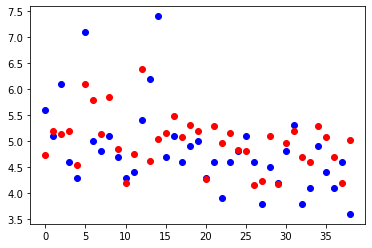

In [19]:
from matplotlib import pyplot as plt
sno=[i for i in range(39)]
plt.scatter(sno,y_test,color="blue",label="Original")
plt.scatter(sno,y_pred,color="red",label="Predicted")
plt.show()

In [20]:
import pickle
filename = 'IBM_LR_model.pickle'
with open(filename, 'wb') as f:
    pickle.dump(model,f, pickle.HIGHEST_PROTOCOL)

In [21]:
l=[[25,25,25,25,1,1,1,1]]
ptest=pd.DataFrame(l)

In [22]:
ptest

,0,1,2,3,4,5,6,7
0,25,25,25,25,1,1,1,1


In [23]:
result=model.predict(ptest)
print(result[0])

5.205507779939346


In [24]:
from sklearn.ensemble import RandomForestRegressor as rf
rf_model=rf(n_estimators=100,random_state=0)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [25]:
y_pred=rf_model.predict(x_test)
find_accuracy(y_test,y_pred)

Results of sklearn.metrics:
MAE: 0.405172466422466
MSE: 0.2784897491750975
RMSE: 0.5277212798202262
R-Squared: 0.55456400141405


In [26]:
filename = 'IBM_RF_model.pickle'
with open(filename, 'wb') as f:
    pickle.dump(rf_model,f, pickle.HIGHEST_PROTOCOL)

In [27]:
from sklearn.tree import DecisionTreeRegressor as DTR
dtr=DTR(random_state=0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [29]:
y_pred=dtr.predict(x_test)
find_accuracy(y_test,y_pred)

Results of sklearn.metrics:
MAE: 0.5487179487179489
MSE: 0.5564102564102564
RMSE: 0.7459291229133345
R-Squared: 0.11003848823269613
